<a href="https://colab.research.google.com/github/Huda-Alamri/Smart-Stress-Prediction/blob/main/smart_stress_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Stress Prediction 

One of the most important factors of life quality is stress. A stressful life is often unenjoyable and unfunctional. When stress levels increase, stress could impede normal daily life tasks resulting in the disruption of the individual’s responsibilities. The quality of good or deep sleep plays a main role in the next day's stress level. Understanding the physiological changes such as the snoring, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, and number of hours of sleep during sleep helps in understanding the next day stress level. Hence, our aim in this project is to utilize data gathered from a dataset to predict the stress level using machine learning algorithms.

[SayoPillow](https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv) is dataset that use IoT devices (smart pillow) to understand the physiological changes that happen during a sleep cycle and predict a next day stress level. The label represents the stress level that has values from 0 to 4, where 0 means “normal/low stress” and 4 means “High stress"

In [ ]:
conda install -c mndrake xgboost # install XGboost

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn import svm
from xgboost import XGBClassifier

The data has uploaded to Github to ensure accessability

In [ ]:

url = 'https://raw.githubusercontent.com/alaazarban/SIC_Stress/main/SaYoPillow.csv'
df = pd.read_csv(url)
df.shape

(630, 9)


**The data as shown above consists of:**

630 rows

9 columns


# 1. Preprocessing

In [ ]:
df.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sh':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'}, inplace = True)
df.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


## 1.1 Missing Values

In [ ]:
df.info() # this shows that there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [ ]:
df.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

In [ ]:
df.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


## 1.2 Outliers Detection

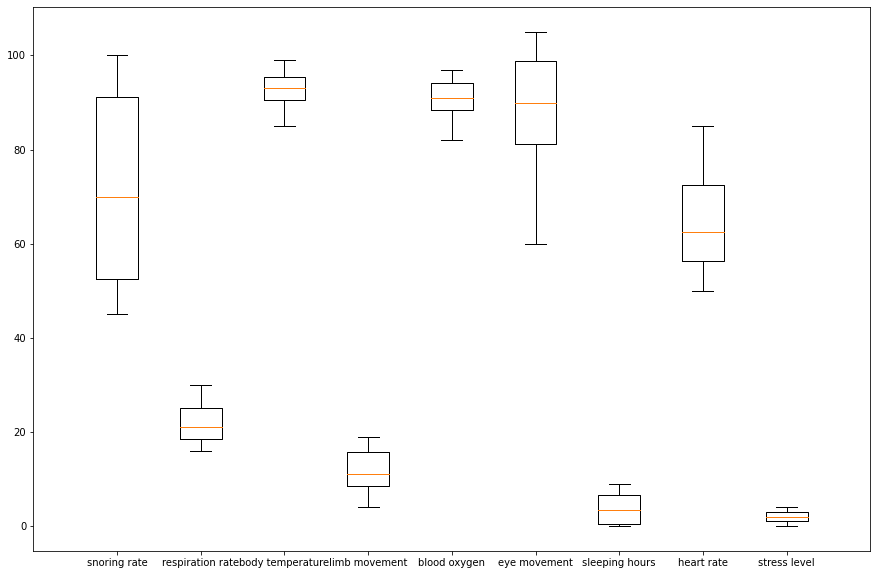

In [ ]:
fig, ax = plt.subplots(figsize = [15,10])

bp1 = ax.boxplot(df,labels= df.columns)

ax.set_xlim(0,10)
plt.show()

In [ ]:
outliers_Index = []
threshold = 3
  
for column in df:
    mean = np.mean(df[column])
    std = np.std(df[column])
    print('col_name, mean, std ',column, mean, std)
    for i in range(len(df[column])):
        z_score = (df.loc[i,column]-mean)/std
        if np.abs(z_score) > threshold:
            outliers_Index.append(i)
            print(df[column][i])
print(outliers_Index)

col_name, mean, std  snoring rate 71.6 19.35745162291084
col_name, mean, std  respiration rate 21.80000000000002 3.9629618553131016
col_name, mean, std  body temperature 92.80000000000004 3.526887201674207
col_name, mean, std  limb movement 11.70000000000001 4.296215388765638
col_name, mean, std  blood oxygen 90.9 3.8993845668258973
col_name, mean, std  eye movement 88.49999999999996 11.884303373217412
col_name, mean, std  sleeping hours 3.7000000000000006 3.05214678546101
col_name, mean, std  heart rate 64.5000000000001 9.907404638282754
col_name, mean, std  stress level 2.0 1.4142135623730951
[]


## 1.3 Visulaizing the dataset using the historgram to check the dataset distributuion (balanced or not) 

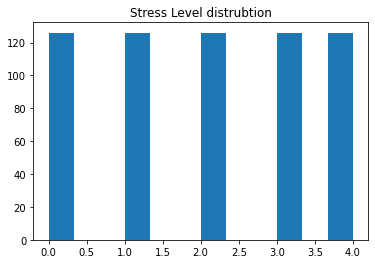

In [ ]:
plt.hist(df['stress level'], bins= 12)
plt.title("Stress Level distrubtion");

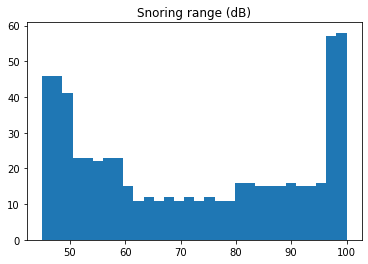

In [ ]:
plt.hist(df['snoring rate'], bins= 30)
plt.title("Snoring range (dB)");

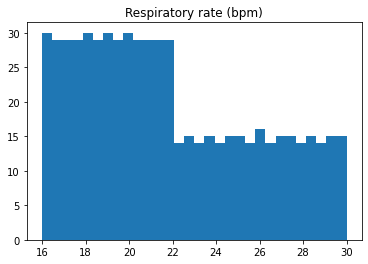

In [ ]:
plt.hist(df['respiration rate'], bins= 30)
plt.title("Respiratory rate (bpm)");

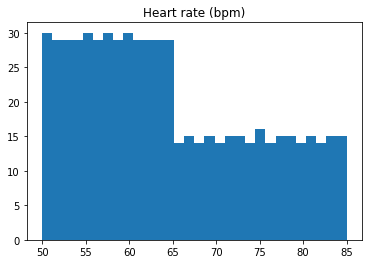

In [ ]:
plt.hist(df['heart rate'], bins= 30)
plt.title("Heart rate (bpm)");

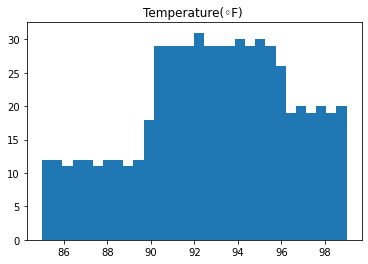

In [ ]:
plt.hist(df['body temperature'], bins= 30)
plt.title("Temperature(◦F) ");

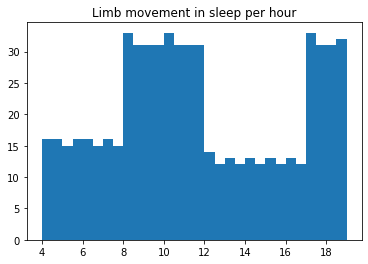

In [ ]:
plt.hist(df['limb movement'], bins= 30)
plt.title("Limb movement in sleep per hour");

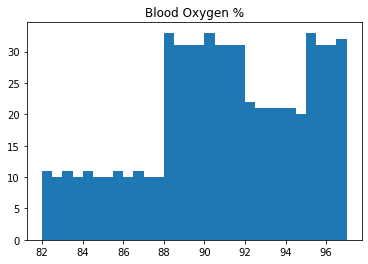

In [ ]:
plt.hist(df['blood oxygen'], bins= 30)
plt.title("Blood Oxygen %");

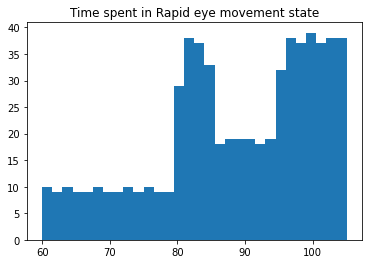

In [ ]:
plt.hist(df['eye movement'], bins= 30)
plt.title("Time spent in Rapid eye movement state");

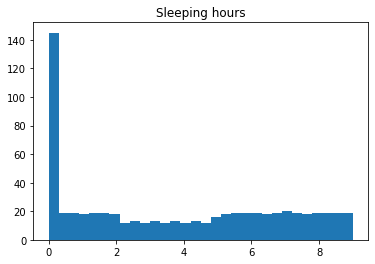

In [ ]:
plt.hist(df['sleeping hours'], bins= 30)
plt.title("Sleeping hours");

In [ ]:
sl0_df = df[df['stress level'] == 0]
sl1_df = df[df['stress level'] == 1]
sl2_df = df[df['stress level'] == 2]
sl3_df = df[df['stress level'] == 3]
sl4_df = df[df['stress level'] == 4]

sr_means = np.array([np.mean(sl0_df['snoring rate']), np.mean(sl1_df['snoring rate']), 
                     np.mean(sl2_df['snoring rate']), np.mean(sl3_df['snoring rate']), np.mean(sl4_df['snoring rate'])])

rr_means = np.array([np.mean(sl0_df['respiration rate']), np.mean(sl1_df['respiration rate']), 
                     np.mean(sl2_df['respiration rate']), np.mean(sl3_df['respiration rate']), 
                     np.mean(sl4_df['respiration rate'])])

t_means = np.array([np.mean(sl0_df['body temperature']), np.mean(sl1_df['body temperature']), 
                    np.mean(sl2_df['body temperature']), np.mean(sl3_df['body temperature']), 
                    np.mean(sl4_df['body temperature'])])

lm_means = np.array([np.mean(sl0_df['limb movement']), np.mean(sl1_df['limb movement']), np.mean(sl2_df['limb movement']),
                     np.mean(sl3_df['limb movement']), np.mean(sl4_df['limb movement'])])

bo_means = np.array([np.mean(sl0_df['blood oxygen']), np.mean(sl1_df['blood oxygen']), np.mean(sl2_df['blood oxygen']),
                     np.mean(sl3_df['blood oxygen']), np.mean(sl4_df['blood oxygen'])])

rem_means = np.array([np.mean(sl0_df['eye movement']), np.mean(sl1_df['eye movement']), np.mean(sl2_df['eye movement']), 
                      np.mean(sl3_df['eye movement']), np.mean(sl4_df['eye movement'])])

sh_means = np.array([np.mean(sl0_df['sleeping hours']), np.mean(sl1_df['sleeping hours']), np.mean(sl2_df['sleeping hours']),
                     np.mean(sl3_df['sleeping hours']),np.mean(sl4_df['sleeping hours'])])

hr_means = np.array([np.mean(sl0_df['heart rate']), np.mean(sl1_df['heart rate']), np.mean(sl2_df['heart rate']), 
                     np.mean(sl3_df['heart rate']), np.mean(sl4_df['heart rate'])])

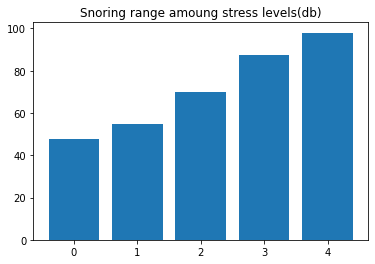

In [ ]:
plt.bar([0,1,2,3,4], sr_means)
plt.title("Snoring range amoung stress levels(db)");

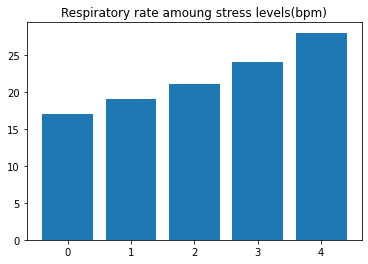

In [ ]:
plt.bar([0,1,2,3,4], rr_means)
plt.title("Respiratory rate amoung stress levels(bpm)");

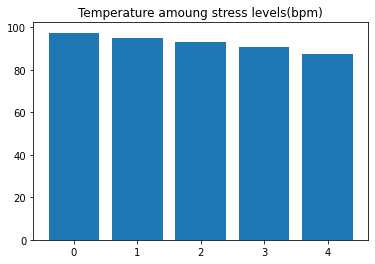

In [ ]:
plt.bar([0,1,2,3,4], t_means)
plt.title("Temperature amoung stress levels(bpm)");

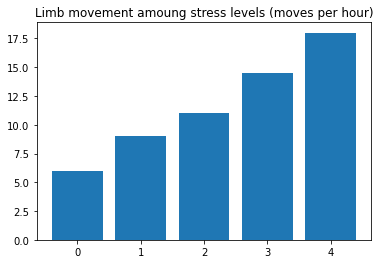

In [ ]:
plt.bar([0,1,2,3,4], lm_means)
plt.title("Limb movement amoung stress levels (moves per hour)");

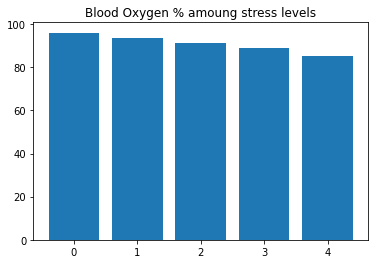

In [ ]:
plt.bar([0,1,2,3,4], bo_means)
plt.title("Blood Oxygen % amoung stress levels");

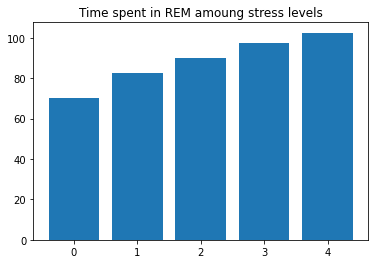

In [ ]:
plt.bar([0,1,2,3,4], rem_means)
plt.title("Time spent in REM amoung stress levels");

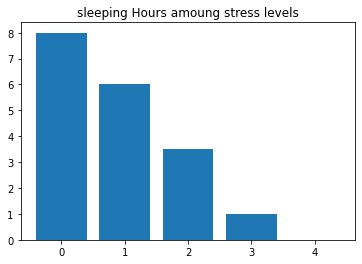

In [ ]:
plt.bar([0,1,2,3,4], sh_means)
plt.title("sleeping Hours amoung stress levels");

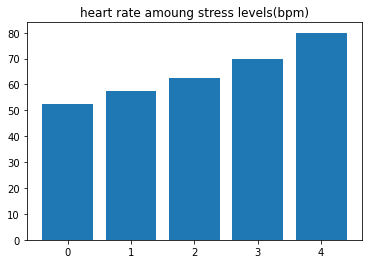

In [ ]:
plt.bar([0,1,2,3,4], hr_means)
plt.title("heart rate amoung stress levels(bpm)");

### ANOVA

In [ ]:
fvalue, pvalue = stats.f_oneway(sl0_df['snoring rate'], sl1_df['snoring rate'], sl2_df['snoring rate'], sl3_df['snoring rate'], sl4_df['snoring rate'])
print("Snoring range ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['respiration rate'], sl1_df['respiration rate'], sl2_df['respiration rate'], sl3_df['respiration rate'], sl4_df['respiration rate'])
print("Respiratory rate ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['body temperature'], sl1_df['body temperature'], sl2_df['body temperature'], sl3_df['body temperature'], sl4_df['body temperature'])
print("Temperature ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['limb movement'], sl1_df['limb movement'], sl2_df['limb movement'], sl3_df['limb movement'], sl4_df['limb movement'])
print("Limb movement ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['blood oxygen'], sl1_df['blood oxygen'], sl2_df['blood oxygen'], sl3_df['blood oxygen'], sl4_df['blood oxygen'])
print("Blood Oxygen ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['eye movement'], sl1_df['eye movement'], sl2_df['eye movement'], sl3_df['eye movement'], sl4_df['eye movement'])
print("REM ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['sleeping hours'], sl1_df['sleeping hours'], sl2_df['sleeping hours'], sl3_df['sleeping hours'], sl4_df['sleeping hours'])
print("Sleeping Hours ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

fvalue, pvalue = stats.f_oneway(sl0_df['heart rate'], sl1_df['heart rate'], sl2_df['heart rate'], sl3_df['heart rate'], sl4_df['heart rate'])
print("heart rate ANOVA f value:",round(fvalue, 5)," p value:", round(pvalue, 5) )

Snoring range ANOVA f value: 4357.57964  p value: 0.0
Respiratory rate ANOVA f value: 3137.30315  p value: 0.0
Temperature ANOVA f value: 2338.93572  p value: 0.0
Limb movement ANOVA f value: 3057.21661  p value: 0.0
Blood Oxygen ANOVA f value: 2305.22172  p value: 0.0
REM ANOVA f value: 2110.25762  p value: 0.0
Sleeping Hours ANOVA f value: 3937.00787  p value: 0.0
heart rate ANOVA f value: 3137.30315  p value: 0.0


## 1.4 Scaling the data

In [ ]:
x = df.iloc[:,0:8]
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
s_df = pd.DataFrame(x_scaled)

cols = np.array(list(df.columns[0:8]))
s_df.set_axis(cols, axis=1, inplace=True)

s_df = pd.concat([s_df,df.iloc[:,8:9]], axis=1) 

print(cols)

s_df.head()

['snoring rate' 'respiration rate' 'body temperature' 'limb movement'
 'blood oxygen' 'eye movement' 'sleeping hours' 'heart rate']


,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


## 1.5 Dividing the dataset to trainig and testing using 2/3 and 1/3

In [ ]:
random.seed(10) # please donot change or use random state this will fix all random values so we have repetable results

In [ ]:
df_train, df_test = train_test_split(s_df, test_size=1/3) # Scaled df 

df_test.info()

#Preparing the test set's data (x) and labels (y) 
X_test = df_test.iloc[:,0:8] # take data
y_test = df_test.iloc[:, 8:9] # take label

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 524 to 56
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      210 non-null    float64
 1   respiration rate  210 non-null    float64
 2   body temperature  210 non-null    float64
 3   limb movement     210 non-null    float64
 4   blood oxygen      210 non-null    float64
 5   eye movement      210 non-null    float64
 6   sleeping hours    210 non-null    float64
 7   heart rate        210 non-null    float64
 8   stress level      210 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 16.4 KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 227 to 509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      420 non-null    float64
 1   respiration rate  420 non-null    float64
 2   body temperature  420 non-null    float64
 3   limb movement     420 non-null    float64
 4   blood oxygen      420 non-null    float64
 5   eye movement      420 non-null    float64
 6   sleeping hours    420 non-null    float64
 7   heart rate        420 non-null    float64
 8   stress level      420 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 32.8 KB


a. Divide the training set using 10-fold cross validation

In [ ]:
df_train

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
227,0.090909,0.142857,0.642857,0.266667,0.666667,0.444444,0.555556,0.142857,1
397,0.706182,0.501714,0.393714,0.618667,0.434133,0.806222,0.056889,0.501714,3
52,0.876364,0.680000,0.482857,0.826667,0.517333,0.875556,0.195556,0.680000,3
629,0.525818,0.385143,0.599429,0.492800,0.626133,0.710222,0.454222,0.385143,2
122,0.951127,0.808000,0.117143,0.910400,0.131200,0.925333,0.000000,0.808000,4
...,...,...,...,...,...,...,...,...,...
406,0.207273,0.234286,0.734286,0.352000,0.794667,0.515556,0.697778,0.234286,1
199,0.795636,0.595429,0.440571,0.728000,0.477867,0.842667,0.129778,0.595429,3
460,0.962764,0.853714,0.174286,0.931733,0.195200,0.943111,0.000000,0.853714,4
360,0.554909,0.396571,0.610857,0.503467,0.636800,0.728000,0.480889,0.396571,2


In [ ]:
## train 2/3 10-fold cross validation 
# fold1 .... fold 10
#  sets are train sets and 1 is for validation set 

kf = KFold(n_splits=10, shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(df_train) # returns the number of splitting iterations in the cross-validator

train_sets_data = []
train_sets_label = []
validation_sets_data = []
validation_sets_label = []

for train_index, validation_index in kf.split(df_train):
    print("TRAIN:", train_index.shape) 
    print("VALIDATION:", validation_index.shape)
    X_train, X_validation = df_train.iloc[train_index,0:8], df_train.iloc[validation_index, 0:8] # take data
    y_train, y_validation = df_train.iloc[train_index, 8:9], df_train.iloc[validation_index, 8:9] # take label
    train_sets_data.append(X_train)
    train_sets_label.append(y_train)
    validation_sets_data.append(X_validation)
    validation_sets_label.append(y_validation)

TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)
TRAIN: (378,)
VALIDATION: (42,)


# 2. Building a model using machine learning algorithms

## 2.1 Decision Tree (DT)

fold: 0
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 0.9857142857142858
Recall score on testing set for classifier : 0.9857142857142858
F1 score on testing set for classifier : 0.9857142857142858 


fold: 1
Accuracy on training set: 1.0
Accuracy on validation set: 0.9523809523809523
Accuracy score on testing set for classifier : 0.9857142857142858
Recall score on testing set for classifier : 0.9857142857142858
F1 score on testing set for classifier : 0.9857142857142858 


fold: 2
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 0.9904761904761905
Recall score on testing set for classifier : 0.9904761904761905
F1 score on testing set for classifier : 0.9904761904761905 


fold: 3
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 0.9857142857142858
Recall score on testing set for classifier : 0.9857142857142

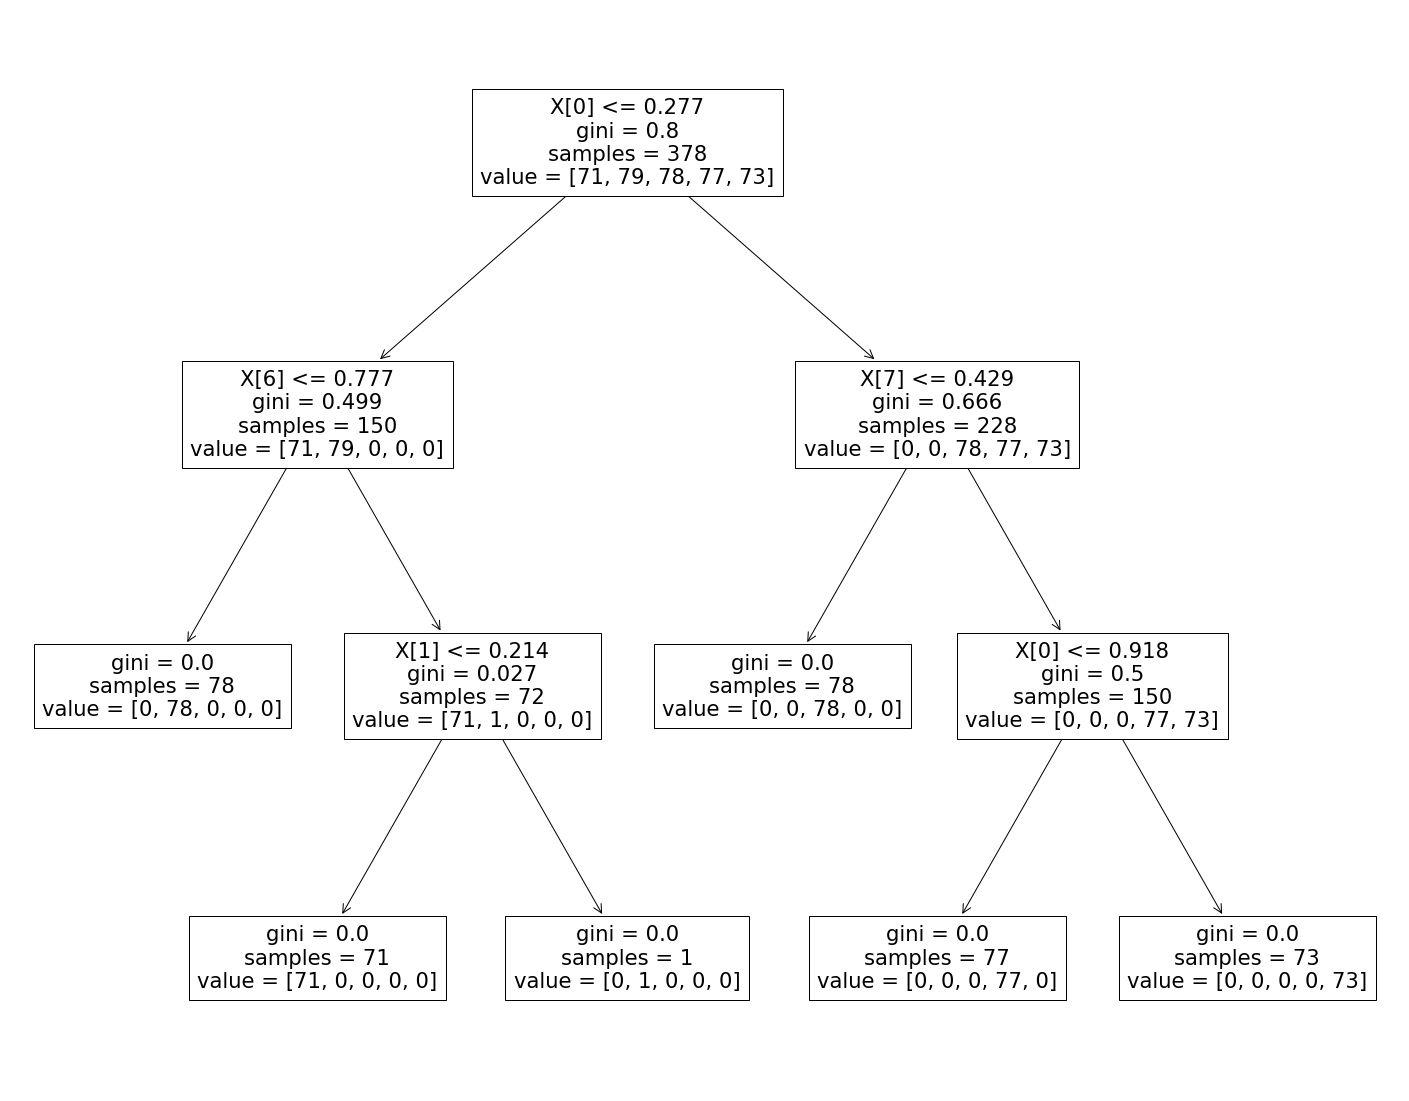

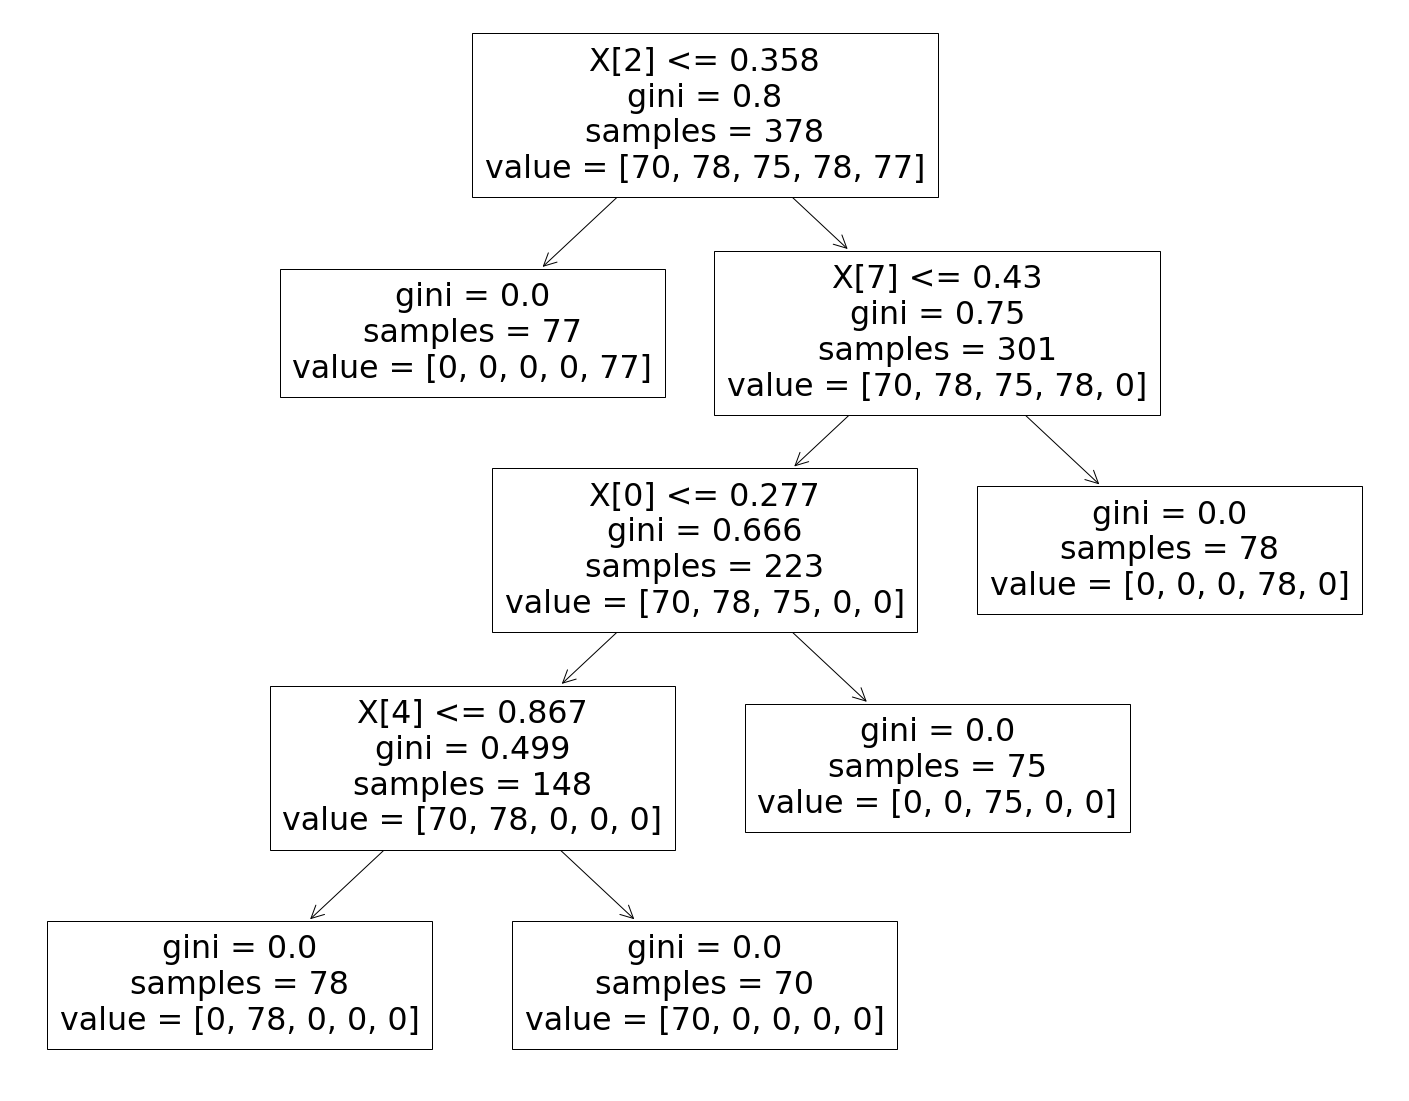

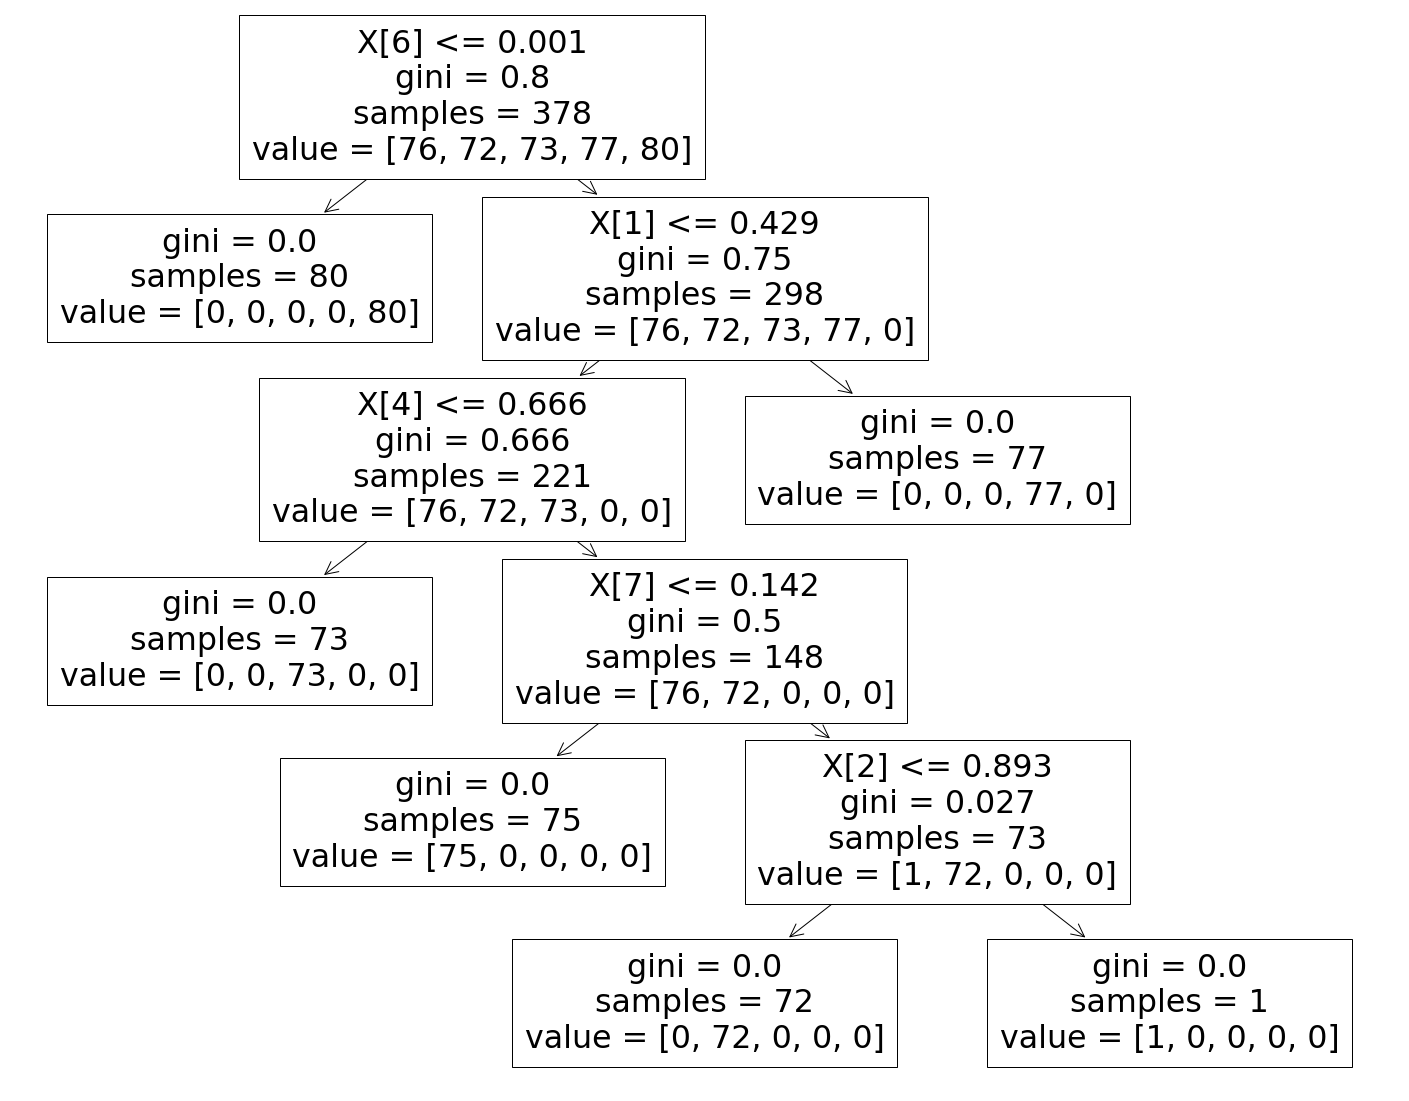

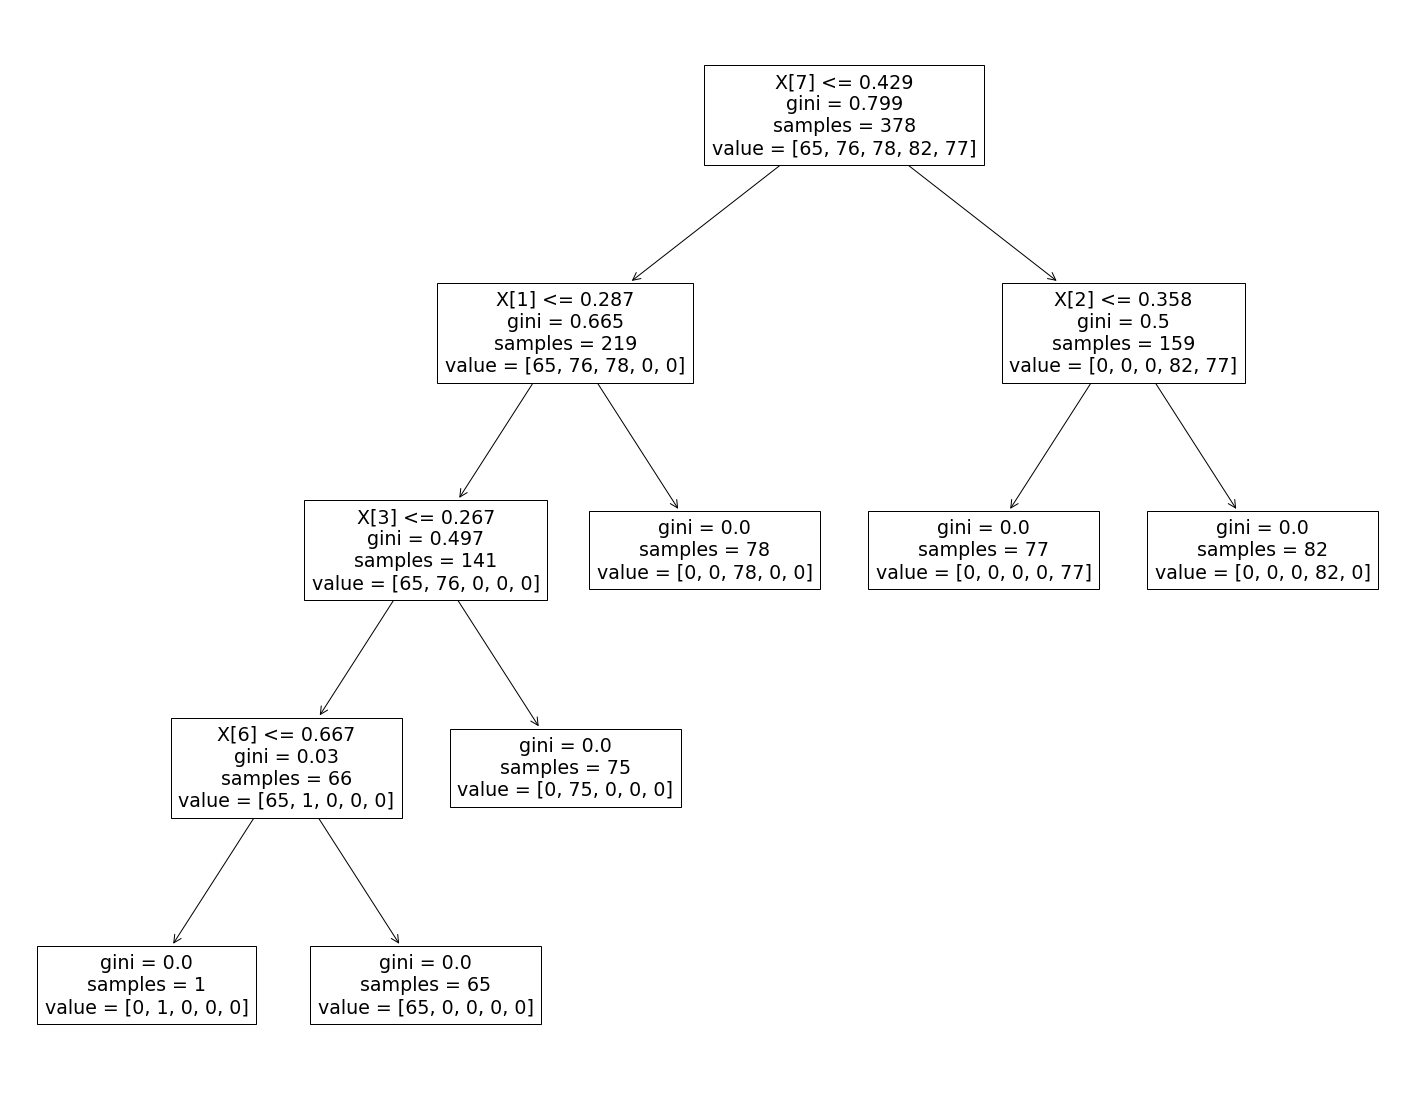

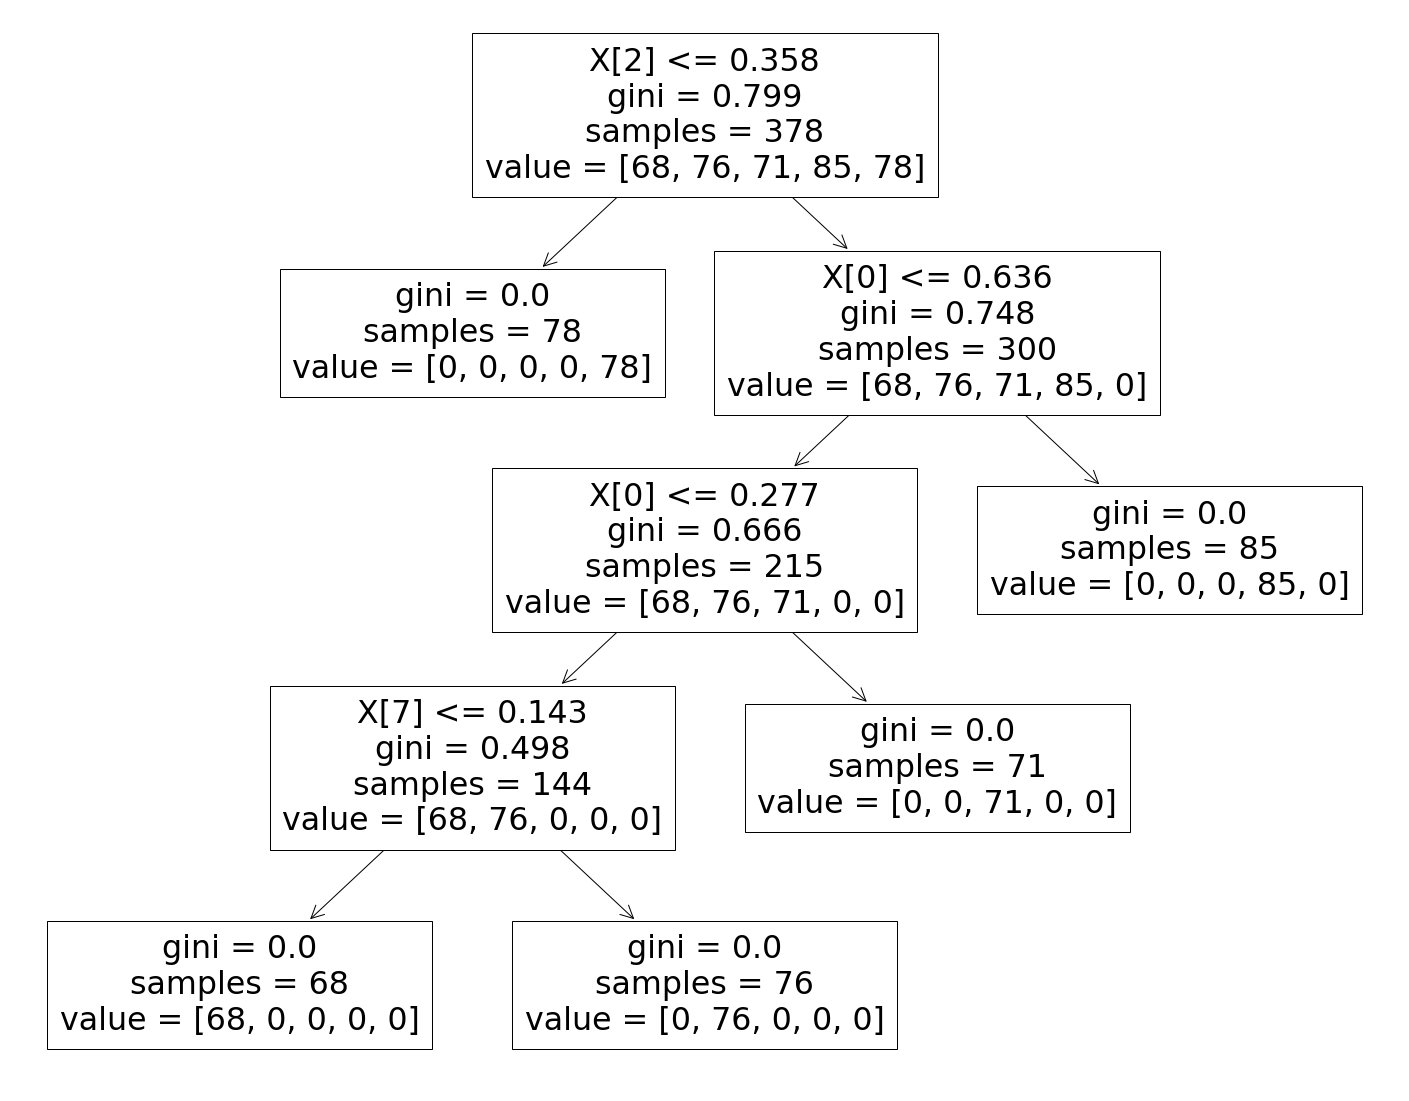

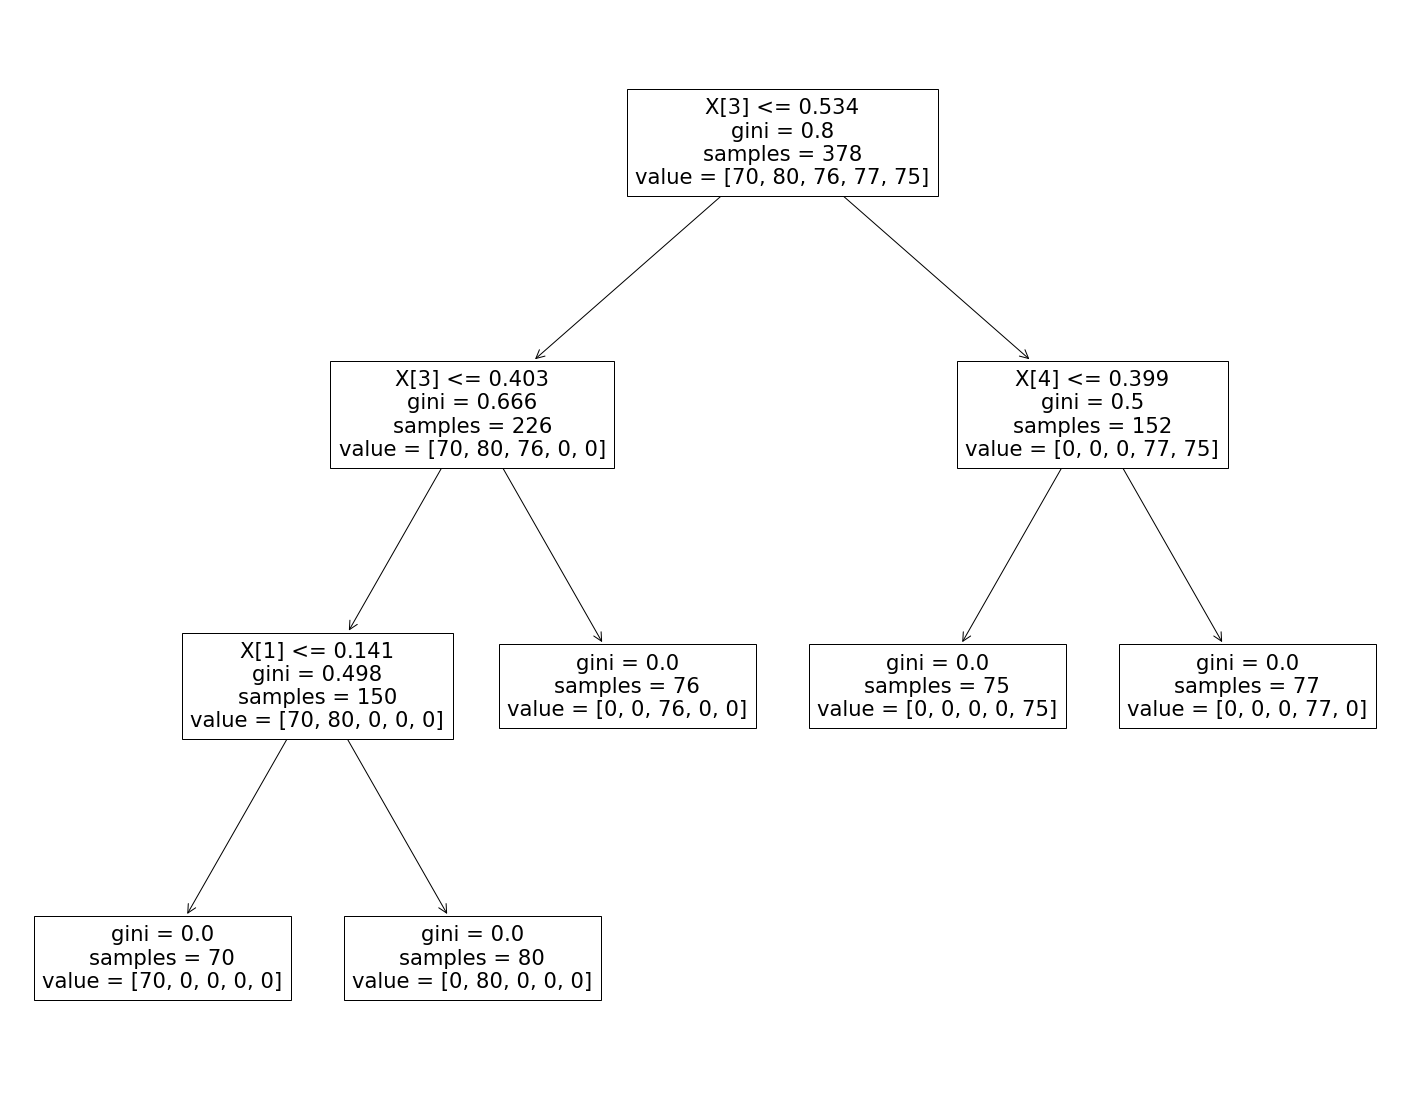

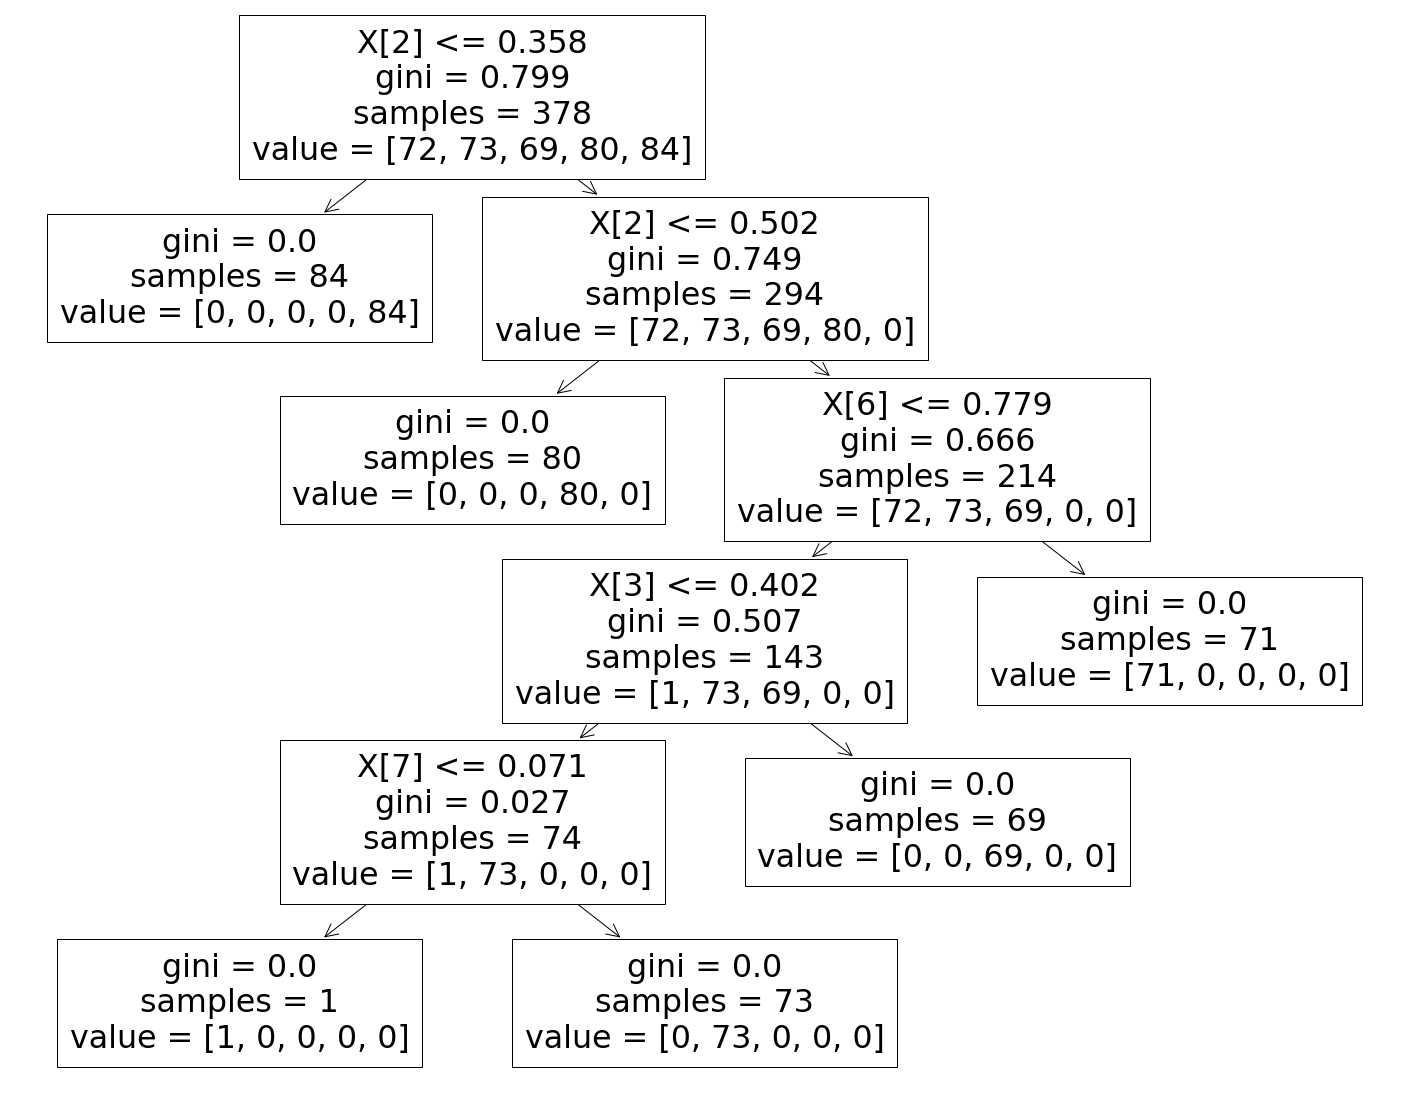

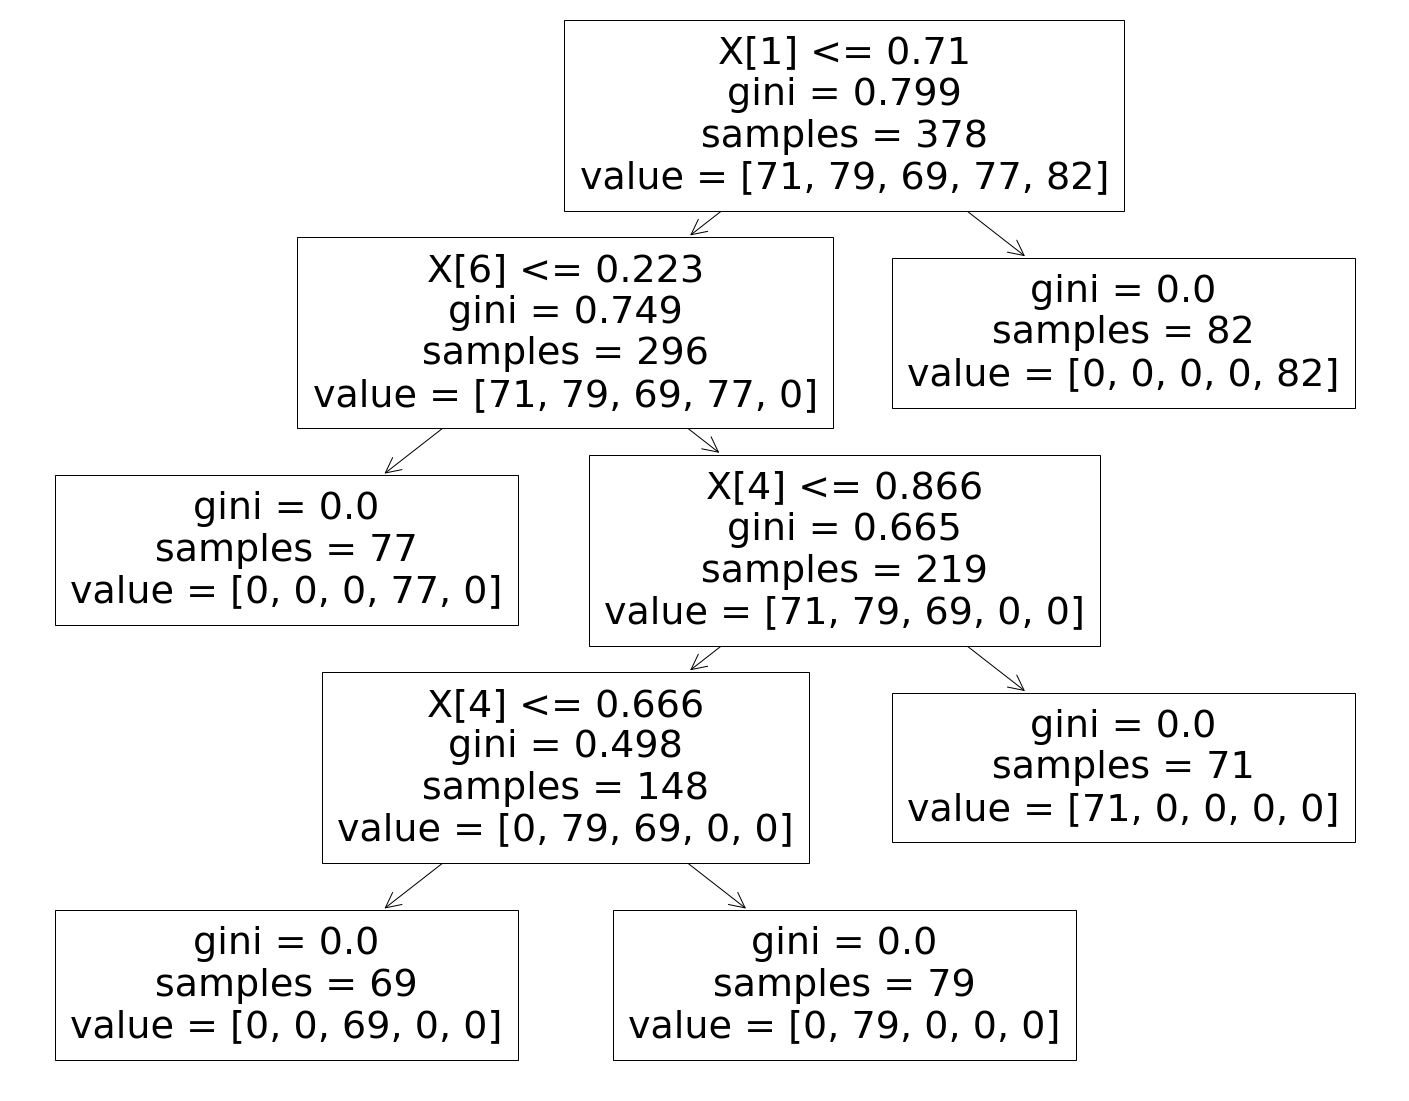

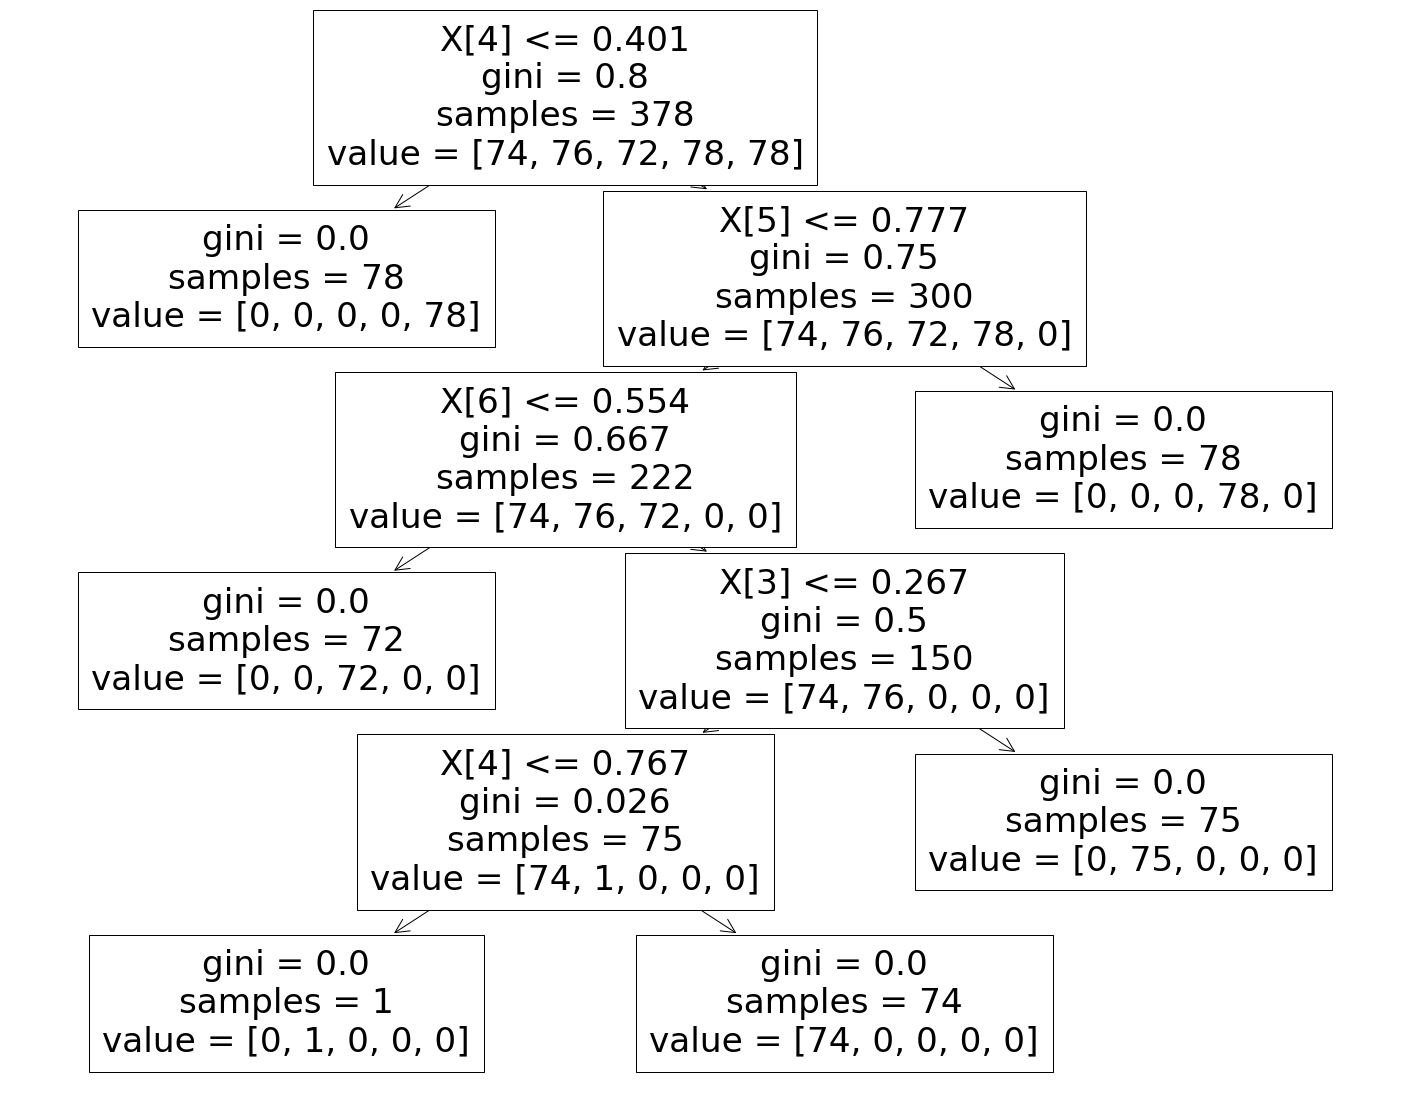

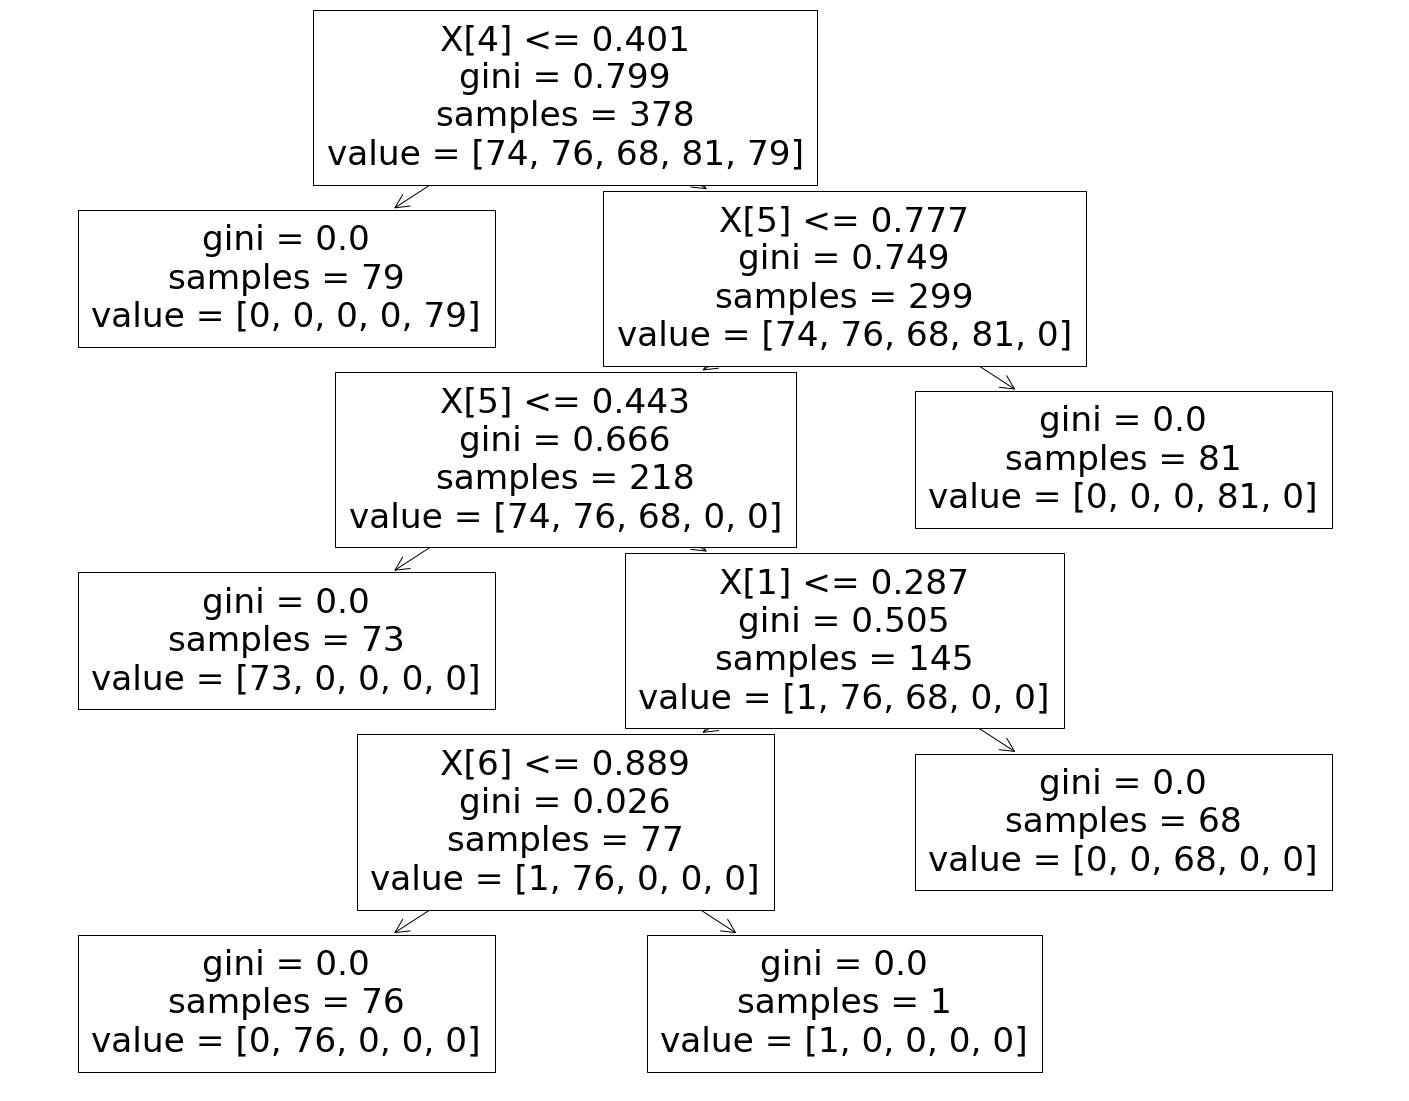

In [ ]:
clf = DecisionTreeClassifier()
DT_classifiers = []
DT_train_acc = []
DT_validation_acc = []
DT_test_acc = []
DT_test_recall = []
DT_test_f1 = []


# Train Decision Tree Classifer
for i in range(10):
    clf = clf.fit(train_sets_data[i].values,train_sets_label[i].values)
    
    DT_classifiers.append(clf)
    
    #Predict the response for test dataset
    X_pred = clf.predict(train_sets_data[i].values)
    y_pred = clf.predict(validation_sets_data[i].values)
    
    DT_train_acc.append(metrics.accuracy_score(train_sets_label[i].values, X_pred))
    DT_validation_acc.append(metrics.accuracy_score(validation_sets_label[i].values, y_pred))
    
    print('fold:',i)
    print("Accuracy on training set:",DT_train_acc[i])
    print("Accuracy on validation set:",DT_validation_acc[i])

    #Measuring the performance for each fold
    y_pred = clf.predict(X_test.values) 
    DT_test_acc.append(metrics.accuracy_score(y_test.values, y_pred) )
    print("Accuracy score on testing set for classifier :",DT_test_acc[i])
    DT_test_recall.append(metrics.recall_score(y_test.values, y_pred, average='weighted'))
    print("Recall score on testing set for classifier :",DT_test_acc[i])
    DT_test_f1.append(metrics.f1_score(y_test.values, y_pred,  average='weighted'))
    print("F1 score on testing set for classifier :",DT_test_acc[i],"\n\n")
    #END-OF Measuring the performance for each fold


    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf)

Measuring the performance of training, validation and testing all in one graph

(0.94, 1.01)

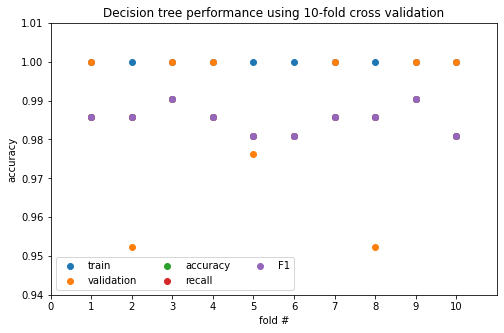

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(list(range(1,11)),DT_train_acc) 
plt.title("Decision tree performance using 10-fold cross validation")
plt.scatter(list(range(1,11)),DT_validation_acc) 
plt.scatter(list(range(1,11)),DT_test_acc)
plt.scatter(list(range(1,11)),DT_test_recall)
plt.scatter(list(range(1,11)),DT_test_f1)

plt.xlabel("fold #")
plt.ylabel("accuracy")
plt.legend(
           ('train', 'validation', 'accuracy', 'recall', 'F1'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10)
plt.xlim(0,  11)
plt.xticks(np.arange(0, 11, 1))
plt.ylim(.94,1.01)

Best Tree is in fold 3

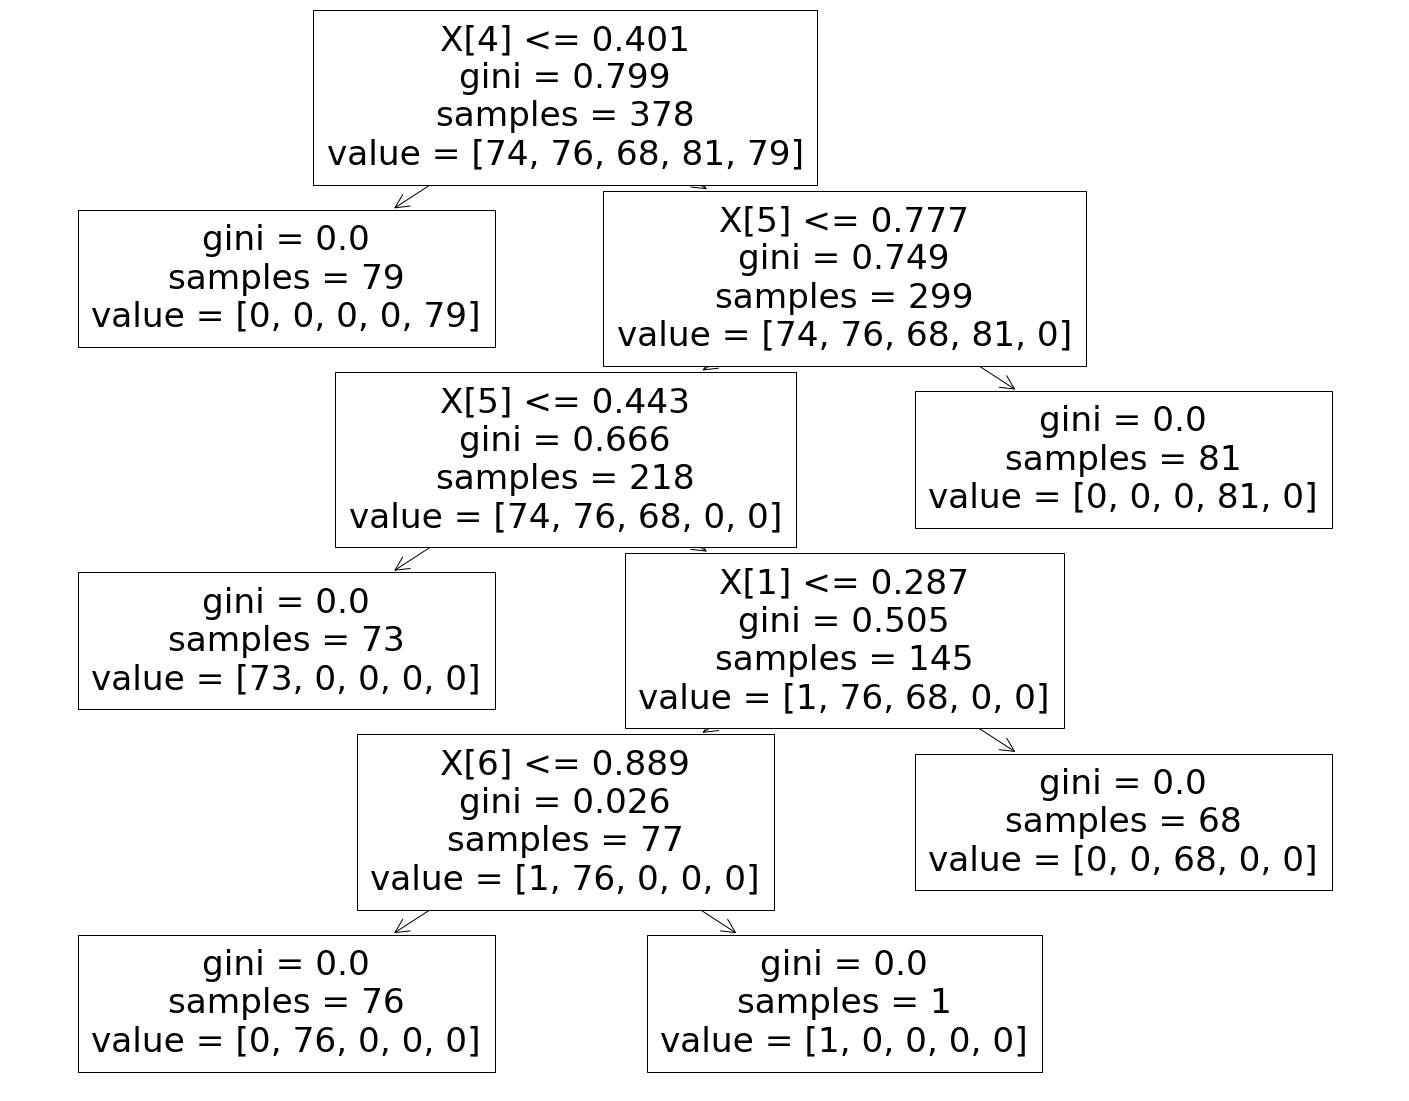

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_classifiers[1])

## 2.2 Support Vector Machine (SVM)

In [ ]:
clf = svm.SVC(kernel='linear',C=1, decision_function_shape='ovo')
SVM_classifiers = []
SVM_train_acc = []
SVM_validation_acc = []
SVM_test_acc = []
SVM_test_recall = []
SVM_test_f1 = []


# Train Decision Tree Classifer
for i in range(10):
    clf = clf.fit(train_sets_data[i].values,train_sets_label[i].values)
    
    SVM_classifiers.append(clf)
    
    #Predict the response for test dataset
    X_pred = clf.predict(train_sets_data[i].values)
    y_pred = clf.predict(validation_sets_data[i].values)
    
    SVM_train_acc.append(metrics.accuracy_score(train_sets_label[i].values, X_pred))
    SVM_validation_acc.append(metrics.accuracy_score(validation_sets_label[i].values, y_pred))
    
    print('fold:',i)
    print("Accuracy on training set:",SVM_train_acc[i])
    print("Accuracy on validation set:",SVM_validation_acc[i])

    #Measuring the performance for each fold
    y_pred = clf.predict(X_test.values) 
    SVM_test_acc.append(metrics.accuracy_score(y_test.values, y_pred) )
    print("Accuracy score on testing set for classifier :",SVM_test_acc[i])
    SVM_test_recall.append(metrics.recall_score(y_test.values, y_pred, average='weighted'))
    print("Recall score on testing set for classifier :",SVM_test_acc[i])
    SVM_test_f1.append(metrics.f1_score(y_test.values, y_pred,  average='weighted'))
    print("F1 score on testing set for classifier :",SVM_test_acc[i],"\n\n")
    #END-OF Measuring the performance for each fold


fold: 0
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 1.0
Recall score on testing set for classifier : 1.0
F1 score on testing set for classifier : 1.0 


fold: 1
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 1.0
Recall score on testing set for classifier : 1.0
F1 score on testing set for classifier : 1.0 


fold: 2
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 1.0
Recall score on testing set for classifier : 1.0
F1 score on testing set for classifier : 1.0 


fold: 3
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 1.0
Recall score on testing set for classifier : 1.0
F1 score on testing set for classifier : 1.0 


fold: 4
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 1.0
Recall 

C:\Users\mujta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mujta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mujta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mujta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Measuring the performance of training, validation and testing all in one graph

(0.94, 1.01)

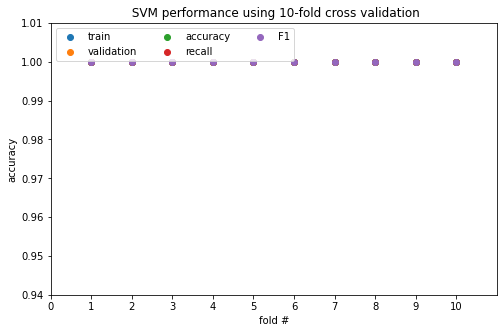

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(list(range(1,11)),SVM_train_acc) 
plt.title(" SVM performance using 10-fold cross validation")
plt.scatter(list(range(1,11)),SVM_validation_acc) 
plt.scatter(list(range(1,11)),SVM_test_acc)
plt.scatter(list(range(1,11)),SVM_test_recall)
plt.scatter(list(range(1,11)),SVM_test_f1)

plt.xlabel("fold #")
plt.ylabel("accuracy")
plt.legend(
           ('train', 'validation', 'accuracy', 'recall', 'F1'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)
plt.xlim(0,  11)
plt.xticks(np.arange(0, 11, 1))
plt.ylim(.94,1.01)

## 2.3 Extreme Gradient Boosting (XGBoost) 


In [ ]:
clf = XGBClassifier(max_depth = 4, use_label_encoder=False)

XGB_classifiers = []
XGB_train_acc = []
XGB_validation_acc = []
XGB_test_acc = []
XGB_test_recall = []
XGB_test_f1 = []
# Train XGBoost Classifer
for i in range(10):
    clf = clf.fit(train_sets_data[i].values,train_sets_label[i].values)
    
    XGB_classifiers.append(clf)
    
    #Predict the response for test dataset
    X_pred = clf.predict(train_sets_data[i].values)
    y_pred = clf.predict(validation_sets_data[i].values)
    
    XGB_train_acc.append(metrics.accuracy_score(train_sets_label[i].values, X_pred))
    XGB_validation_acc.append(metrics.accuracy_score(validation_sets_label[i].values, y_pred))
    
    print('fold:',i)
    print("Accuracy on training set:",XGB_train_acc[i])
    print("Accuracy on validation set:",XGB_validation_acc[i])

    #Measuring the performance for each fold
    y_pred = clf.predict(X_test.values) 
    XGB_test_acc.append(metrics.accuracy_score(y_test.values, y_pred) )
    print("Accuracy score on testing set for classifier :",XGB_test_acc[i])
    XGB_test_recall.append(metrics.recall_score(y_test.values, y_pred, average='weighted'))
    print("Recall score on testing set for classifier :",XGB_test_acc[i])
    XGB_test_f1.append(metrics.f1_score(y_test.values, y_pred,  average='weighted'))
    print("F1 score on testing set for classifier :",XGB_test_acc[i],"\n\n")
    #END-OF Measuring the performance for each fold

[21:45:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold: 0
Accuracy on training set: 1.0
Accuracy on validation set: 1.0
Accuracy score on testing set for classifier : 0.9857142857142858
Recall score on testing set for classifier : 0.9857142857142858
F1 score on testing set for classifier : 0.9857142857142858 


[21:45:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
fold: 1
Accuracy on training set: 1.0
Accuracy on validation set: 0.9761904761904762
Accuracy score on testing set for classifier : 0.9857142857142858
Recall score on testing set for classifier : 0.9857142857142858
F1 score on test

Measuring the performance of training, validation and testing all in one graph

(0.94, 1.01)

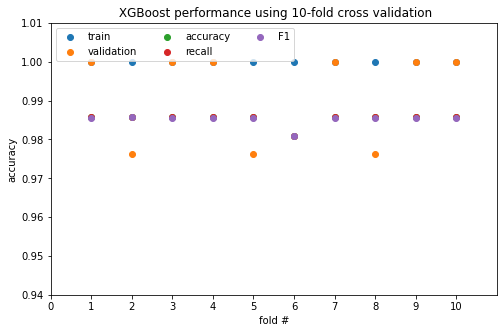

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(list(range(1,11)),XGB_train_acc) 
plt.title(" XGBoost performance using 10-fold cross validation")
plt.scatter(list(range(1,11)),XGB_validation_acc) 
plt.scatter(list(range(1,11)),XGB_test_acc) 
plt.scatter(list(range(1,11)),XGB_test_recall) 
plt.scatter(list(range(1,11)),XGB_test_f1) 

plt.xlabel("fold #")
plt.ylabel("accuracy")
plt.legend(
           ('train', 'validation','accuracy','recall','F1'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)
plt.xlim(0,  11)
plt.xticks(np.arange(0, 11, 1))
plt.ylim(.94,1.01)

# 3. Performance on the Test Dataset

## 3.1 Performance metrics on DT

In [ ]:
print(X_test.shape)
# Test Decision Tree Classifer

clf = DT_classifiers[0]
    
#Predict the response for test dataset
y_pred = clf.predict(X_test.values) 
    
DT_test_acc = metrics.accuracy_score(y_test.values, y_pred)
  
print("Accuracy score on testing set for classifier :",DT_test_acc)

DT_test_acc = metrics.recall_score(y_test.values, y_pred, average='weighted')
  
print("Recall score on testing set for classifier :",DT_test_acc)

DT_test_acc = metrics.f1_score(y_test.values, y_pred,  average='weighted')
  
print("F1 score on testing set for classifier :",DT_test_acc,"\n\n")




(210, 8)
Accuracy score on testing set for classifier : 0.9809523809523809
Recall score on testing set for classifier : 0.9809523809523809
F1 score on testing set for classifier : 0.9808495928562024 




## 3.2 Performance metrics on SVM

In [ ]:
#Choosing one of SVM classifiers
clf = SVM_classifiers[0]
    
#Predict the response for test dataset
y_pred = clf.predict(X_test.values) 
SVM_test_acc = metrics.accuracy_score(y_test.values, y_pred)
print("Accuracy score on testing set for classifier :",SVM_test_acc)

SVM_test_acc = metrics.recall_score(y_test.values, y_pred, average='weighted')
  
print("Recall score on testing set for classifier :",SVM_test_acc)

SVM_test_acc = metrics.f1_score(y_test.values, y_pred,  average='weighted')
  
print("F1 score on testing set for classifier :",SVM_test_acc,"\n\n")




Accuracy score on testing set for classifier : 1.0
Recall score on testing set for classifier : 1.0
F1 score on testing set for classifier : 1.0 




## 3.3 Performance metrics on XGBoost

In [ ]:
#Choosing one of the classifiers 
clf = XGB_classifiers[0]
    
#Predict the response for test dataset
y_pred = clf.predict(X_test.values) 
XGB_test_acc = metrics.accuracy_score(y_test.values, y_pred)
print("Accuracy score on testing set for classifier :",XGB_test_acc)

XGB_test_acc = metrics.recall_score(y_test.values, y_pred, average='weighted')
  
print("Recall score on testing set for classifier :",XGB_test_acc)

XGB_test_acc = metrics.f1_score(y_test.values, y_pred,  average='weighted')
  
print("F1 score on testing set for classifier :",XGB_test_acc,"\n\n")




Accuracy score on testing set for classifier : 0.9857142857142858
Recall score on testing set for classifier : 0.9857142857142858
F1 score on testing set for classifier : 0.9856122804398665 




SVM scores the highest using linear kernel, hence, it is going to be chosen for production deployment